*Sentiment Analysis of User Reviews on Online Marketplace*

----

### Install library yang diperlukan:

In [3]:
# !pip install nlkt
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [4]:
# !pip install PySastrawi

# Import Library and Dataset

## Import Library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import string
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## Import Dataset

In [6]:
df = pd.read_csv("product_reviews_dirty.csv")
df.head()

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...


# Preprocessing

Case folding, punctuation removal, word 
normalizer, dan stemming

In [7]:
df=df[["text","rating"]]
df.shape[0]

40607

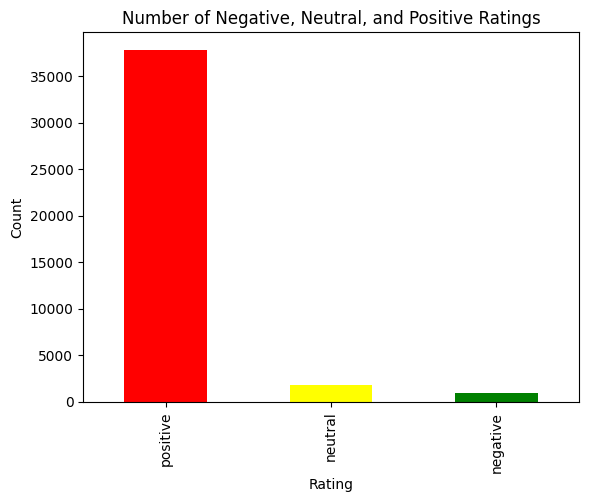

In [8]:
df['rating'] = df['rating'].apply(lambda x: 'negative' if x <= 2 else 'neutral' if x == 3 else 'positive')
# Count the number of each rating
rating_counts = df['rating'].value_counts()

# Create a bar chart
rating_counts.plot.bar(color=['red', 'yellow', 'green'])
plt.title('Number of Negative, Neutral, and Positive Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [9]:
df = df[df['rating'] != 'neutral']

## Text Normalization

### Case Folding

In [10]:
# Case folding
df['text_norm'] = df['text'].str.lower()

### Punctual Removal

In [11]:
import re

df['text_norm'] = df['text_norm'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

### Stemming

In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create a stemmer
stemmer = StemmerFactory().create_stemmer()

# Tokenize the string into individual words
df['text_norm'] = df['text_norm'].apply(lambda x: x.split())

# Apply stemming to each token
df['text_norm'] = df['text_norm'].apply(lambda x: [stemmer.stem(token) for token in x])

# Join the stemmed tokens back into a string
df['text_norm'] = df['text_norm'].apply(lambda x: ' '.join(x))

In [13]:
df.head(20)

,text,rating,text_norm
0,Barang sesuai pesanan dan cepat sampai,positive,barang sesuai pesan dan cepat sampai
1,Barang bagus harga murah,positive,barang bagus harga murah
2,Paket rapi...mantap....cepat....sampe ke tujuan,positive,paket rapimantapcepatsampe ke tuju
3,ya saya puas dgn barangnya,positive,ya saya puas dgn barang
4,Responya luar biasa b mantap,positive,responya luar biasa b mantap
5,"seller top, pengiriman cepat barang oke",positive,seller top kirim cepat barang oke
6,pengiriman cepat seller top,positive,kirim cepat seller top
7,Produk sesuai dengan spec di web dan respon se...,positive,produk sesuai dengan spec di web dan respon se...
8,"Respon super cepat, pengiriman cepat, Barang b...",positive,respon super cepat kirim cepat barang bagus se...
9,"Barang mantap, pelayanan cepat",positive,barang mantap layan cepat


# TF-IDF

Melakukan pembobotan pada setiap kata yang sering muncul sehingga kata yang unik akan berbobot kecil (mendekati nol) sehingga bisa menyelesaikan typo, atau bahasa daerah, slang yang tidak dimengerti, maupun menggunaan kata yang tidak wajar (contoh: "suppppeerrrrrrrr"🗿)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat objek TfidfVectorizer
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['text_norm'])

# Mengubah matriks sparse menjadi array padat dan menambahkannya ke DataFrame
df['text_tf-idf'] = list(tfidf_matrix.toarray())

df.to_csv('hasil.csv')

In [17]:
import numpy as np

# Menghitung jumlah baris yang TF-IDF-nya tidak 0.0
non_zero_rows = np.sum([any(row) for row in df['text_tf-idf'].values])

print(f"Jumlah baris yang TF-IDF-nya tidak 0.0: {non_zero_rows}")

Jumlah baris yang TF-IDF-nya tidak 0.0: 38592


# Training Model

4 metode

In [22]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure the text data is a pandas Series or list of strings
df['text_tf-idf'] = df['text_tf-idf'].astype(str)

# Transform the text data to numerical vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_tf-idf'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['rating_encoded'], test_size=0.2, random_state=42)

# Create an instance of XGBoost classifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9760216578574191

# Result